# 3D mouse example

In [1]:
import sys
import watershed3d
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step

load file 

In [2]:
filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

image is three-dimensional
found probability map /Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered_Probabilities.h5


check histogram of image data

In [3]:
# w.intensity_histogram()

load Ilastik probability mask and plot it

In [4]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

shape (35, 971, 973) (35, 971, 973)
loaded probability map


do segmentation without the object classifier

In [5]:
w.segment(sigma=(2,6,6), min_distance=2)

len rp= 1485
segmentation done, found 1619 cells


show segmentation

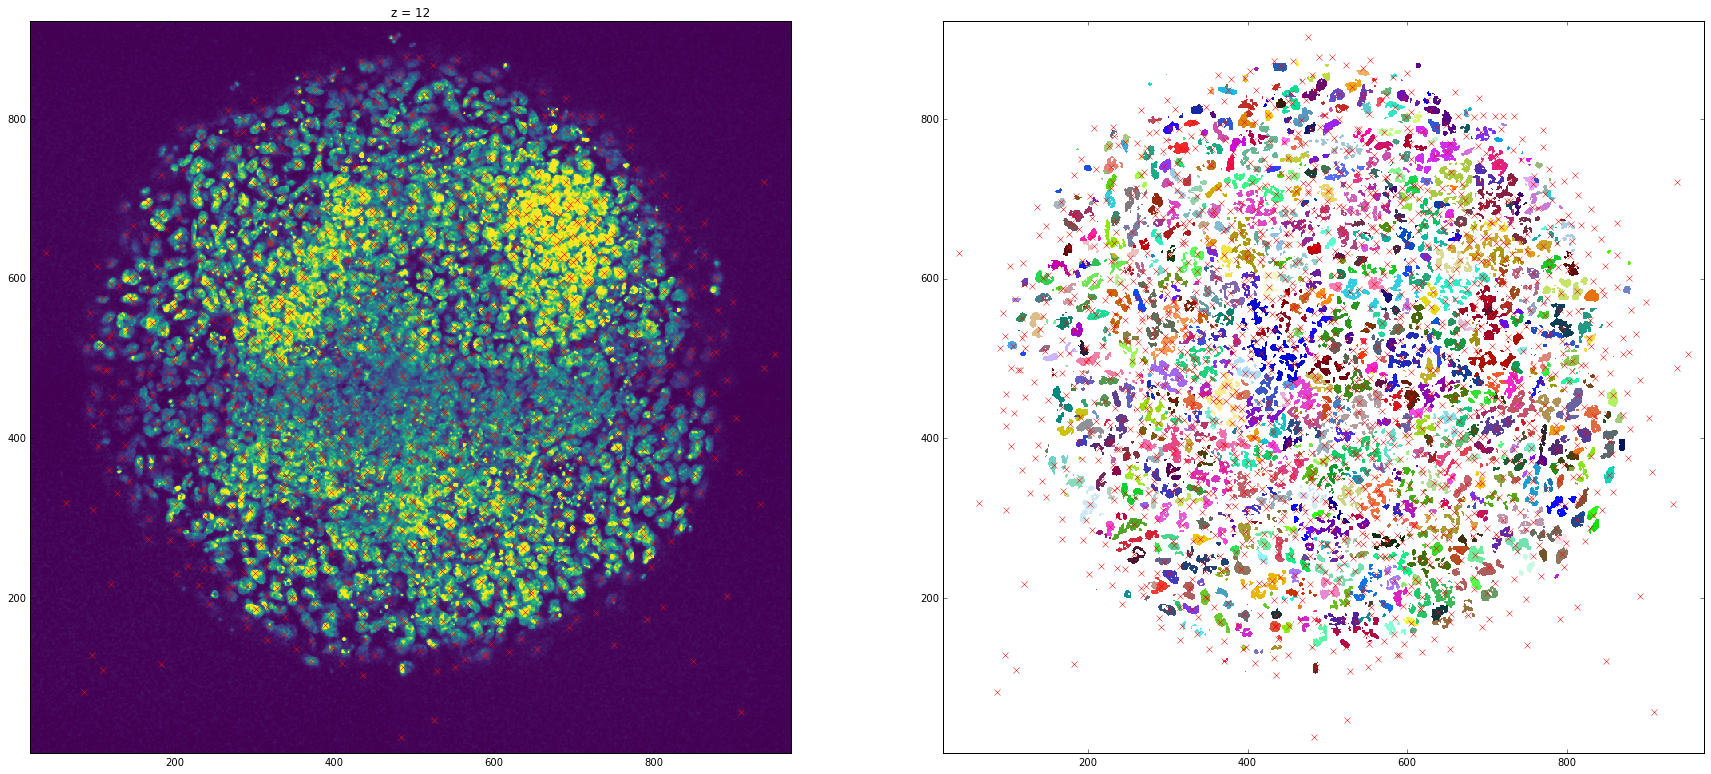

In [6]:
w.show_segmentation(z=12,figsize=(30,20))

In [7]:
w.df.head()

,area,total_intensity,mean_intensity,centroid
cell_id,,,,
2,229,90174.0,393.772926,"[2.82096069869, 310.179039301, 98.0917030568]"
3,83,8952.0,107.855422,"[2.65060240964, 318.373493976, 933.313253012]"
4,130,22996.0,176.892308,"[2.86153846154, 318.7, 63.5]"
5,2,678.0,339.000000,"[2.0, 332.0, 126.5]"
6,842,277654.0,329.755344,"[2.66033254157, 392.195961995, 138.071258907]"


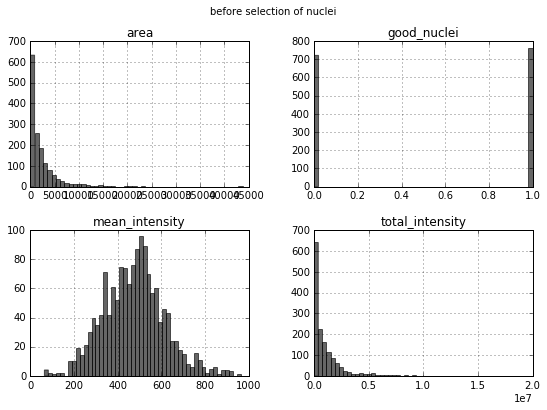

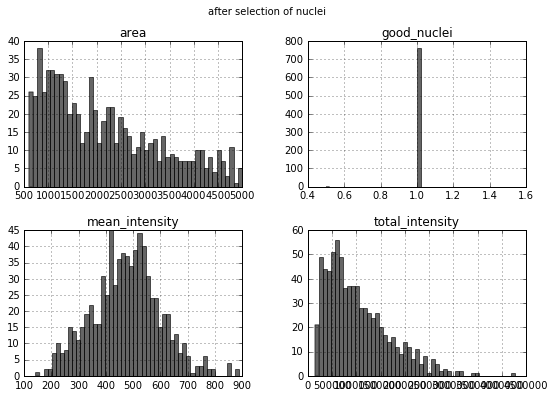

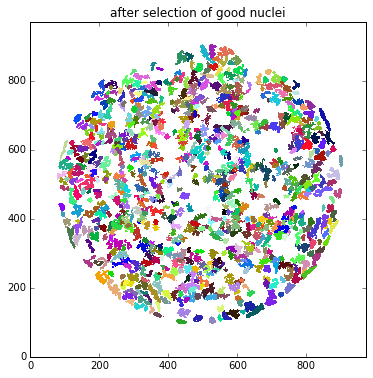

In [8]:
w.select_nuclei(quantiles=[0.2,0.85], cutoff=[600,5000], plot=1)

apply to other channels

In [9]:
filename_bra = '/Users/jakob/Documents/RU/Data/mouse_example/C3-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'
filename_foxa2 = '/Users/jakob/Documents/RU/Data/mouse_example/C4-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'
filename_cdx2 = '/Users/jakob/Documents/RU/Data/mouse_example/C5-Brachy_568_FoxA2_488_Cdx2_647_500um_2.tif'

In [11]:
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_foxa2, 'foxa2')
w.apply_to_channels(filename_cdx2, 'cdx2')

len rp= 1485
len rp= 1485
len rp= 1485


In [12]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [13]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,good_nuclei,bra,foxa2,cdx2
cell_id,,,,,,,,
2,229,90174.0,393.772926,"[2.82096069869, 310.179039301, 98.0917030568]",False,9815.558314,2574.589629,2401.322114
3,83,8952.0,107.855422,"[2.65060240964, 318.373493976, 933.313253012]",False,16901.163057,19238.397114,6162.365657
4,130,22996.0,176.892308,"[2.86153846154, 318.7, 63.5]",False,9670.050571,2889.911143,3633.536571
5,2,678.0,339.000000,"[2.0, 332.0, 126.5]",False,139.293086,95.660171,92.177486
6,842,277654.0,329.755344,"[2.66033254157, 392.195961995, 138.071258907]",True,29932.389086,29397.932171,144079.721486


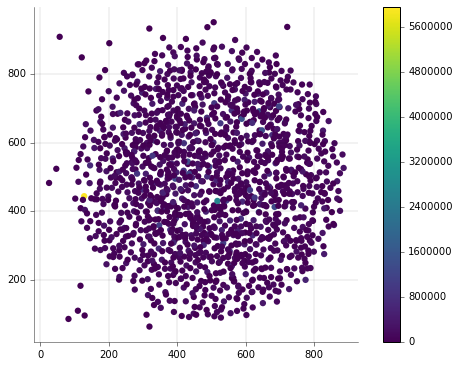

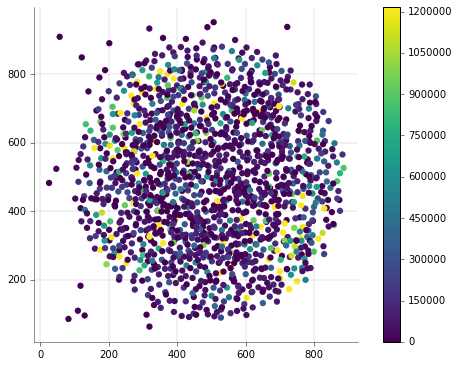

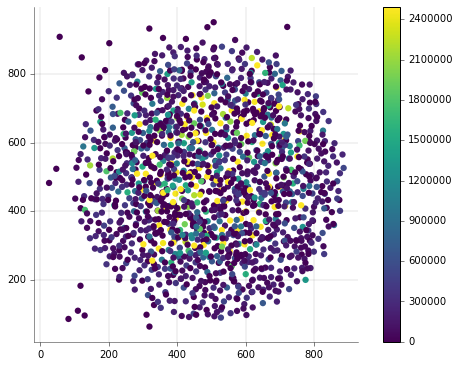

In [25]:
w.dot_plot('bra', colormap_cutoff=0.8)
w.dot_plot('foxa2', colormap_cutoff=0.3)
w.dot_plot('cdx2', colormap_cutoff=0.2)

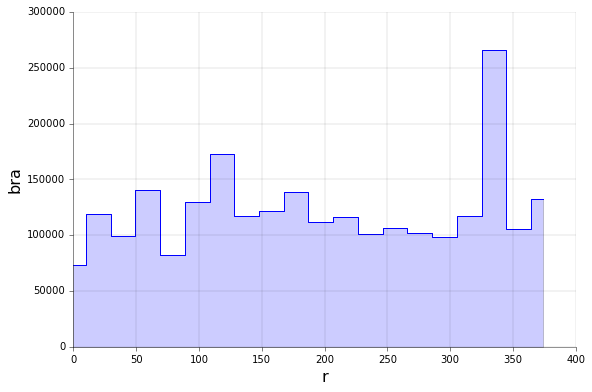

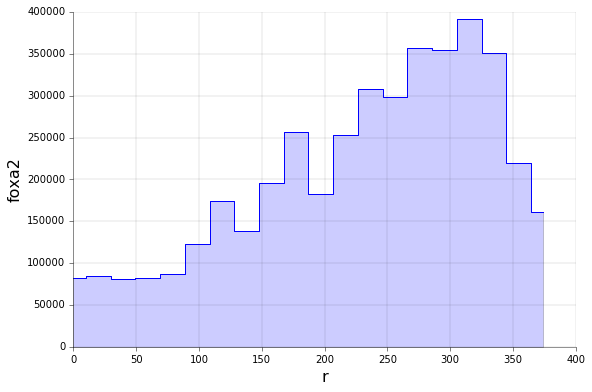

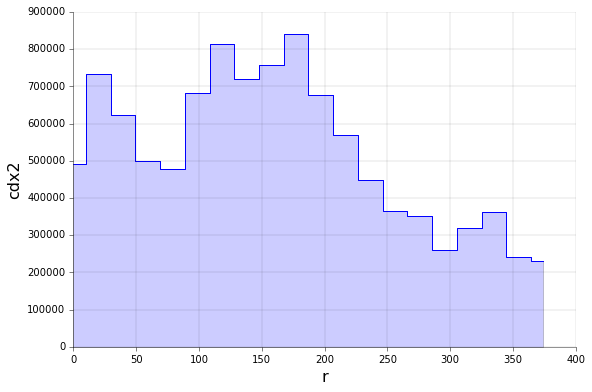

In [26]:
w.radial_profile_per_cell('bra',20, only_selected_cells=1);
w.radial_profile_per_cell('foxa2',20, only_selected_cells=1);
w.radial_profile_per_cell('cdx2',20, only_selected_cells=1);

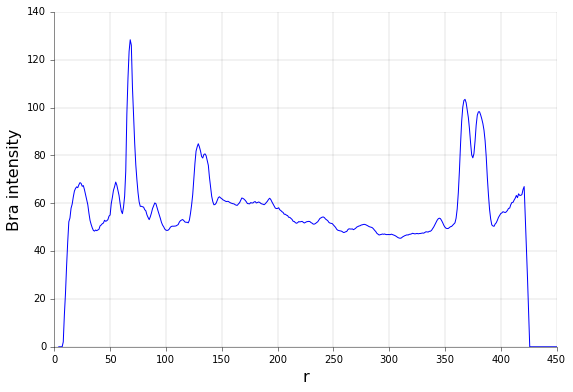

In [27]:
r,rs = w.radial_intensity('bra', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Bra intensity', fontsize=16)
w.nice_spines(ax)

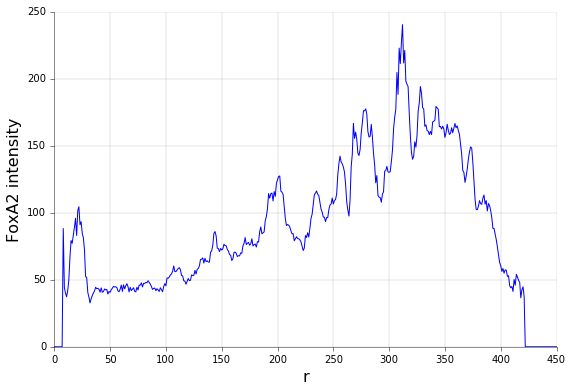

In [28]:
r,rs = w.radial_intensity('foxa2', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,rs)
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('FoxA2 intensity', fontsize=16)
w.nice_spines(ax)

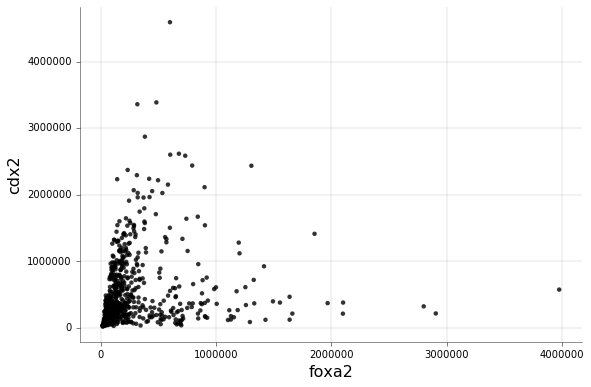

In [29]:
w.coexpression_per_cell('foxa2', 'cdx2', only_selected_cells=1)

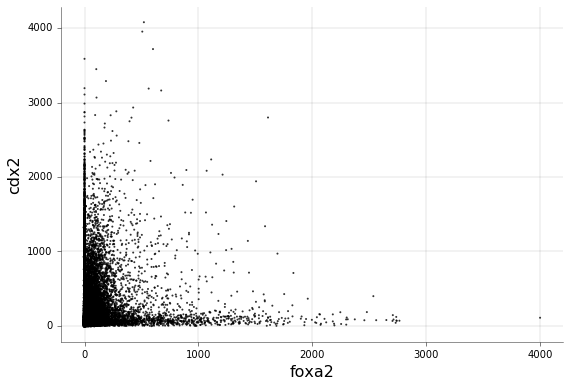

In [30]:
w.coexpression_per_pixel('foxa2', 'cdx2', downsample=100, only_selected_cells=0)